<a href="https://colab.research.google.com/github/Leox48/Disinformation-Threat-Intelligence/blob/main/Confronto_Risultati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Campaign Based


### TF-IDF VOTING


In [ ]:
import pandas as pd

# Carica il file Excel
df = pd.read_excel('/content/TF-IDF_Voting_Labelled.xlsx')

# Calcola l'Accuracy
accuracy = (df['CAMPAGNA'] == df['Campagna Assegnata']).mean()

# Calcola la campagna-specific accuracy
campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).mean())

# Calcola il Misclassification Rate
misclassification_rate = 1 - accuracy

#Misura la proporzione di campagne per cui almeno un articolo è stato etichettato correttamente. Questo può essere utile se ci sono molte campagne e vuoi assicurarti che il sistema non ne stia ignorando nessuna.

# Calcola la Coverage
coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).sum() > 0)).mean()

# Calcola l'Accuracy specifica per numero di articoli
# Raggruppa per ID ARTICOLO e controlla se tutte le tuple per ogni articolo sono corrette
article_accuracy = df.groupby('ID ARTICOLO').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).all()).mean()

# Stampa i risultati
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
# print("\nCampagna-Specific Accuracy:")
#print(campagna_specific_accuracy)
print(f"\nCoverage: {coverage:.2f}")
print(f"Accuracy per Articolo: {article_accuracy:.2f}")

Accuracy: 0.95
Misclassification Rate: 0.05

Coverage: 1.00
Accuracy per Articolo: 0.96


<ipython-input-1-9099332266aa>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).mean())
<ipython-input-1-9099332266aa>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).sum() > 0)).mean()
<ipython-input-1

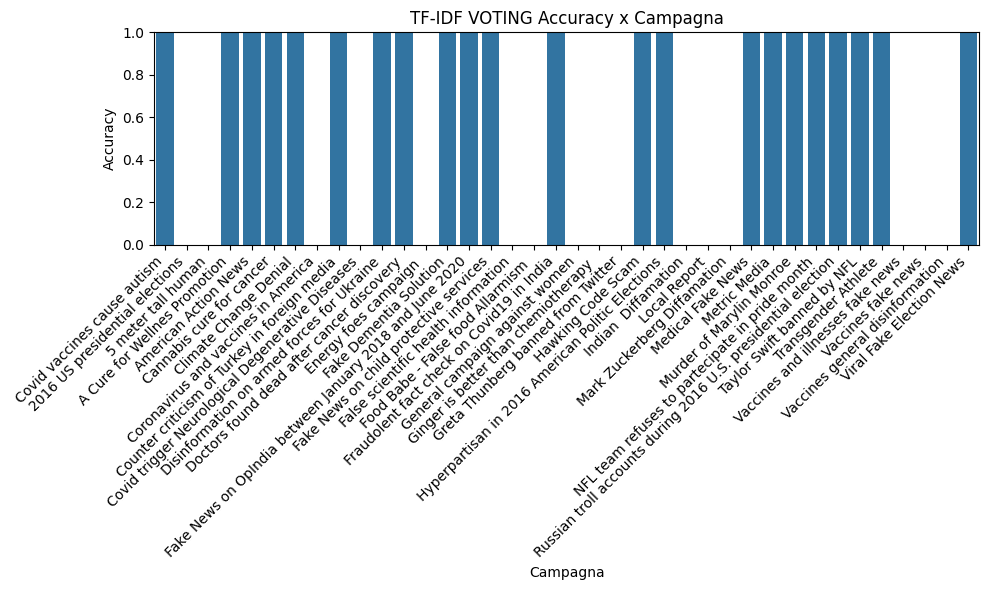

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Crea un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=campagna_specific_accuracy.index, y=campagna_specific_accuracy.values)

# Aggiungi titoli e etichette
plt.title('TF-IDF VOTING Accuracy x Campagna')
plt.xlabel('Campagna')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

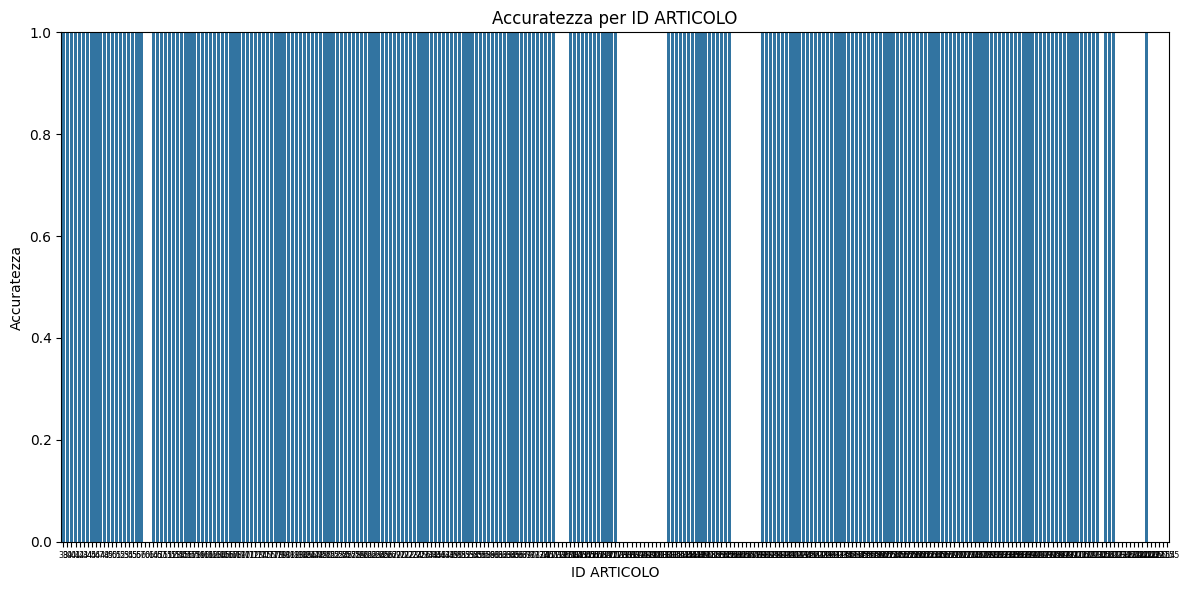

     ID ARTICOLO  Correctly_Labeled  Total_Tuples  Accuracy
0             38                 13            13       1.0
1             39                 12            12       1.0
2             40                 21            21       1.0
3             41                 13            13       1.0
4             42                 16            16       1.0
..           ...                ...           ...       ...
266        12149                  0            13       0.0
267        12150                  0            20       0.0
268        12151                  0            20       0.0
269        12154                  0            10       0.0
270        12155                  0            14       0.0

[271 rows x 4 columns]


In [ ]:
# Crea una nuova colonna per indicare se la tupla è stata etichettata correttamente
df['Correct_Label'] = df['CAMPAGNA'] == df['Campagna Assegnata']

# Raggruppa per ID ARTICOLO e calcola il numero di tuple totali e corrette
article_stats = df.groupby('ID ARTICOLO')['Correct_Label'].agg(['sum', 'count']).reset_index()
article_stats.columns = ['ID ARTICOLO', 'Correctly_Labeled', 'Total_Tuples']

# Calcola l'accuratezza per ogni articolo
article_stats['Accuracy'] = article_stats['Correctly_Labeled'] / article_stats['Total_Tuples']

# Crea un bar plot dell'accuratezza per articolo
plt.figure(figsize=(12, 6))
sns.barplot(x='ID ARTICOLO', y='Accuracy', data=article_stats)

# Aggiungi titoli e etichette
plt.title('Accuratezza per ID ARTICOLO')
plt.xlabel('ID ARTICOLO')
plt.ylabel('Accuratezza')
plt.xticks(rotation=0, fontsize='xx-small',linespacing=100000)  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

# Stampa le statistiche per controllo
print(article_stats)

### TF-IDF Thresholding

In [ ]:
import pandas as pd

# Carica il file Excel
df = pd.read_excel('/content/TF-IDF THRESHOLDING Results.xlsx')

# Calcola l'Accuracy
accuracy = (df['CAMPAGNA'] == df['Campagna Assegnata']).mean()

# Calcola la campagna-specific accuracy
campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).mean())

# Calcola il Misclassification Rate
misclassification_rate = 1 - accuracy

# Calcola la Coverage
coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).sum() > 0)).mean()

# Calcola l'Accuracy specifica per numero di articoli
# Raggruppa per ID ARTICOLO e controlla se tutte le tuple per ogni articolo sono corrette
article_accuracy = df.groupby('ID ARTICOLO').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).all()).mean()

# Stampa i risultati
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
# print("\nCampagna-Specific Accuracy:")
#print(campagna_specific_accuracy)
print(f"\nCoverage: {coverage:.2f}")
print(f"Accuracy per Articolo: {article_accuracy:.2f}")

Accuracy: 0.87
Misclassification Rate: 0.13

Coverage: 0.66
Accuracy per Articolo: 0.89


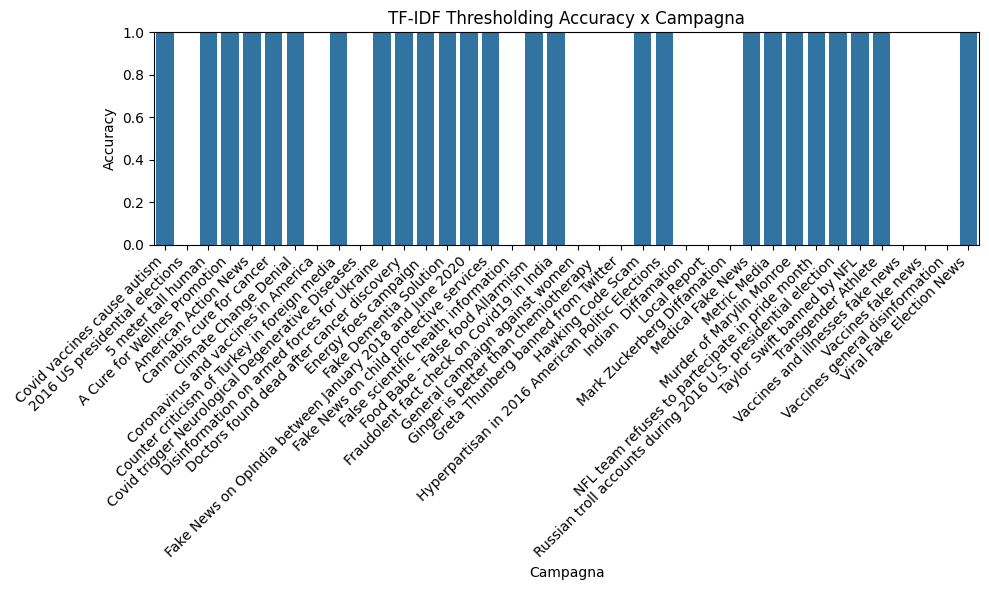

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Crea un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=campagna_specific_accuracy.index, y=campagna_specific_accuracy.values)

# Aggiungi titoli e etichette
plt.title('TF-IDF Thresholding Accuracy x Campagna')
plt.xlabel('Campagna')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

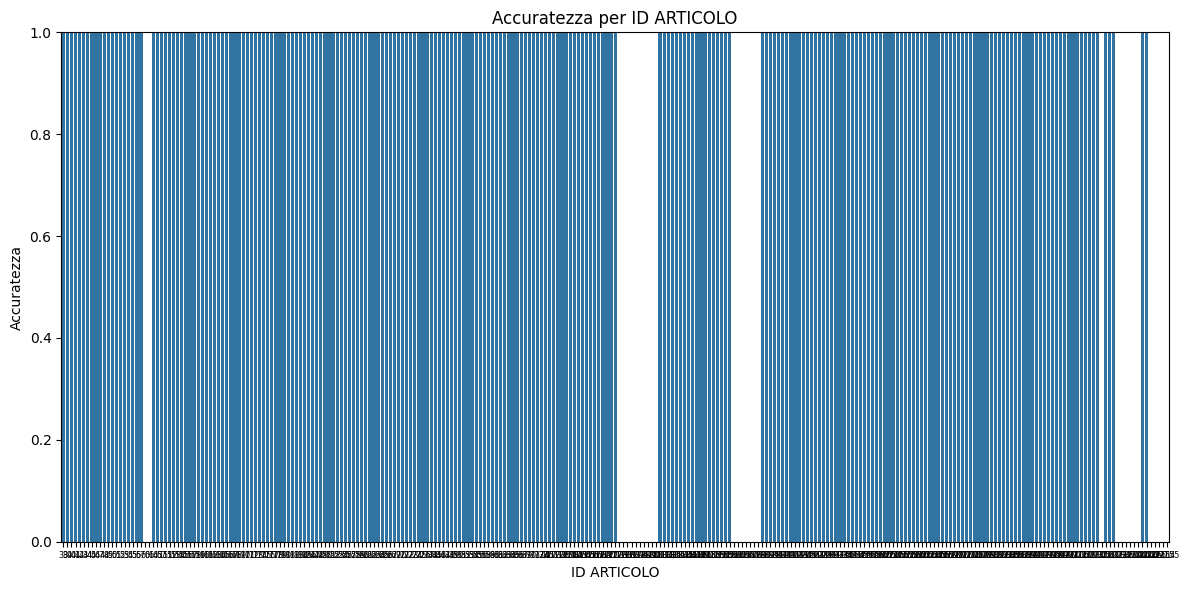

     ID ARTICOLO  Correctly_Labeled  Total_Tuples  Accuracy
0             38                 13            13       1.0
1             39                 12            12       1.0
2             40                 21            21       1.0
3             41                 13            13       1.0
4             42                 16            16       1.0
..           ...                ...           ...       ...
266        12149                  0            13       0.0
267        12150                  0            20       0.0
268        12151                  0            20       0.0
269        12154                  0            10       0.0
270        12155                  0            14       0.0

[271 rows x 4 columns]


In [ ]:
# Crea una nuova colonna per indicare se la tupla è stata etichettata correttamente
df['Correct_Label'] = df['CAMPAGNA'] == df['Campagna Assegnata']

# Raggruppa per ID ARTICOLO e calcola il numero di tuple totali e corrette
article_stats = df.groupby('ID ARTICOLO')['Correct_Label'].agg(['sum', 'count']).reset_index()
article_stats.columns = ['ID ARTICOLO', 'Correctly_Labeled', 'Total_Tuples']

# Calcola l'accuratezza per ogni articolo
article_stats['Accuracy'] = article_stats['Correctly_Labeled'] / article_stats['Total_Tuples']

# Crea un bar plot dell'accuratezza per articolo
plt.figure(figsize=(12, 6))
sns.barplot(x='ID ARTICOLO', y='Accuracy', data=article_stats)

# Aggiungi titoli e etichette
plt.title('Accuratezza per ID ARTICOLO')
plt.xlabel('ID ARTICOLO')
plt.ylabel('Accuratezza')
plt.xticks(rotation=0, fontsize='xx-small',linespacing=100000)  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

# Stampa le statistiche per controllo
print(article_stats)

### SBERT VOTING

In [ ]:
import pandas as pd

# Carica il file Excel
df = pd.read_excel('/content/SBERT_Voting_Labelled.xlsx')

# Calcola l'Accuracy
accuracy = (df['CAMPAGNA'] == df['Campagna Assegnata']).mean()

# Calcola la campagna-specific accuracy
campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).mean())

# Calcola il Misclassification Rate
misclassification_rate = 1 - accuracy

# Calcola la Coverage
coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).sum() > 0)).mean()

# Calcola l'Accuracy specifica per numero di articoli
# Raggruppa per ID ARTICOLO e controlla se tutte le tuple per ogni articolo sono corrette
article_accuracy = df.groupby('ID ARTICOLO').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).all()).mean()

# Stampa i risultati
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
# print("\nCampagna-Specific Accuracy:")
#print(campagna_specific_accuracy)
print(f"\nCoverage: {coverage:.2f}")
print(f"Accuracy per Articolo: {article_accuracy:.2f}")

Accuracy: 0.97
Misclassification Rate: 0.03

Coverage: 1.00
Accuracy per Articolo: 0.96


<ipython-input-2-1c6bda077524>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).mean())
<ipython-input-2-1c6bda077524>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).sum() > 0)).mean()
<ipython-input-2

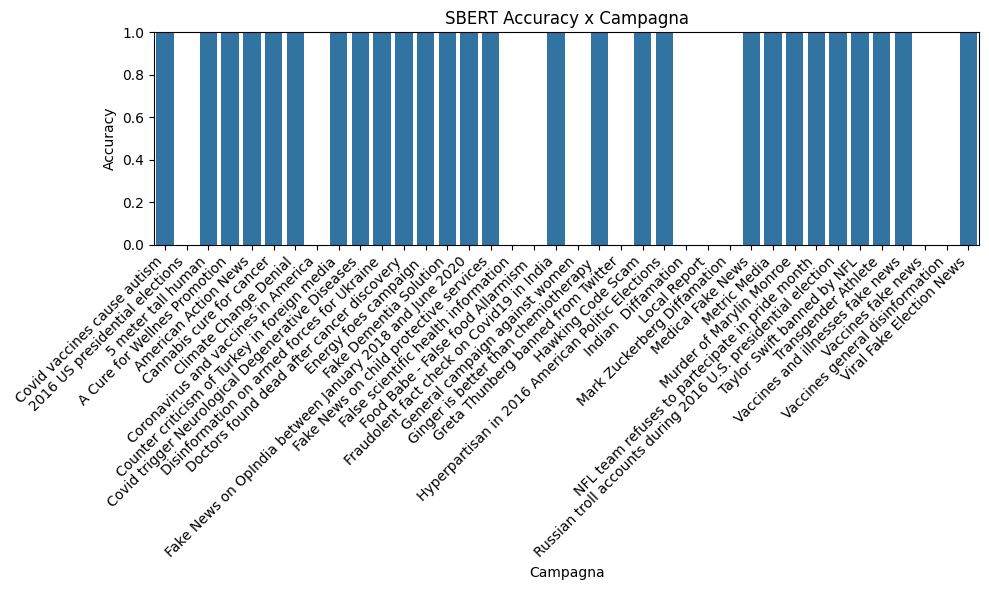

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Crea un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=campagna_specific_accuracy.index, y=campagna_specific_accuracy.values)

# Aggiungi titoli e etichette
plt.title('SBERT Accuracy x Campagna')
plt.xlabel('Campagna')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

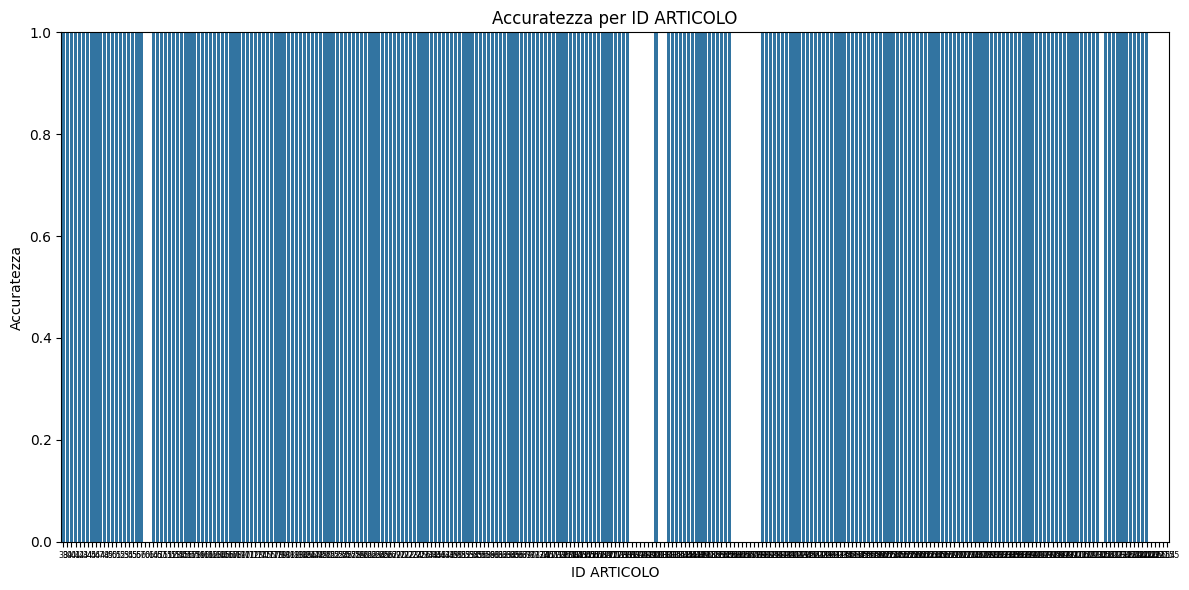

     ID ARTICOLO  Correctly_Labeled  Total_Tuples  Accuracy
0             38                 13            13       1.0
1             39                 12            12       1.0
2             40                 21            21       1.0
3             41                 13            13       1.0
4             42                 16            16       1.0
..           ...                ...           ...       ...
266        12149                  0            13       0.0
267        12150                  0            20       0.0
268        12151                  0            20       0.0
269        12154                  0            10       0.0
270        12155                  0            14       0.0

[271 rows x 4 columns]


In [ ]:
# Crea una nuova colonna per indicare se la tupla è stata etichettata correttamente
df['Correct_Label'] = df['CAMPAGNA'] == df['Campagna Assegnata']

# Raggruppa per ID ARTICOLO e calcola il numero di tuple totali e corrette
article_stats = df.groupby('ID ARTICOLO')['Correct_Label'].agg(['sum', 'count']).reset_index()
article_stats.columns = ['ID ARTICOLO', 'Correctly_Labeled', 'Total_Tuples']

# Calcola l'accuratezza per ogni articolo
article_stats['Accuracy'] = article_stats['Correctly_Labeled'] / article_stats['Total_Tuples']

# Crea un bar plot dell'accuratezza per articolo
plt.figure(figsize=(12, 6))
sns.barplot(x='ID ARTICOLO', y='Accuracy', data=article_stats)

# Aggiungi titoli e etichette
plt.title('Accuratezza per ID ARTICOLO')
plt.xlabel('ID ARTICOLO')
plt.ylabel('Accuratezza')
plt.xticks(rotation=0, fontsize='xx-small',linespacing=100000)  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

# Stampa le statistiche per controllo
print(article_stats)

## Article Based

### TF-IDF VOTING


In [ ]:
import pandas as pd

# Carica il file Excel
df = pd.read_excel('/content/TF-IDF Voting Result (A).xlsx')

# Calcola l'Accuracy
accuracy = (df['CAMPAGNA'] == df['Campagna Assegnata']).mean()

# Calcola la campagna-specific accuracy
campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).mean())

# Calcola il Misclassification Rate
misclassification_rate = 1 - accuracy

# Calcola la Coverage
coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).sum() > 0)).mean()

# Calcola l'Accuracy specifica per numero di articoli
# Raggruppa per ID ARTICOLO e controlla se tutte le tuple per ogni articolo sono corrette
article_accuracy = df.groupby('ID ARTICOLO').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).all()).mean()

# Stampa i risultati
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
# print("\nCampagna-Specific Accuracy:")
#print(campagna_specific_accuracy)
print(f"\nCoverage: {coverage:.2f}")
print(f"Accuracy per Articolo: {article_accuracy:.2f}")

Accuracy: 0.64
Misclassification Rate: 0.36

Coverage: 0.63
Accuracy per Articolo: 0.56


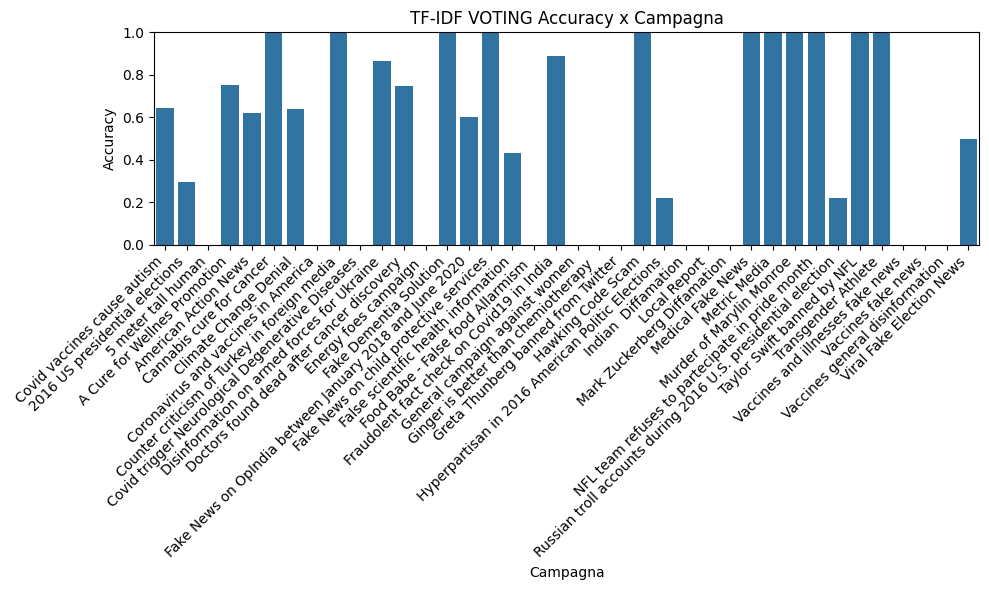

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Crea un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=campagna_specific_accuracy.index, y=campagna_specific_accuracy.values)

# Aggiungi titoli e etichette
plt.title('TF-IDF VOTING Accuracy x Campagna')
plt.xlabel('Campagna')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

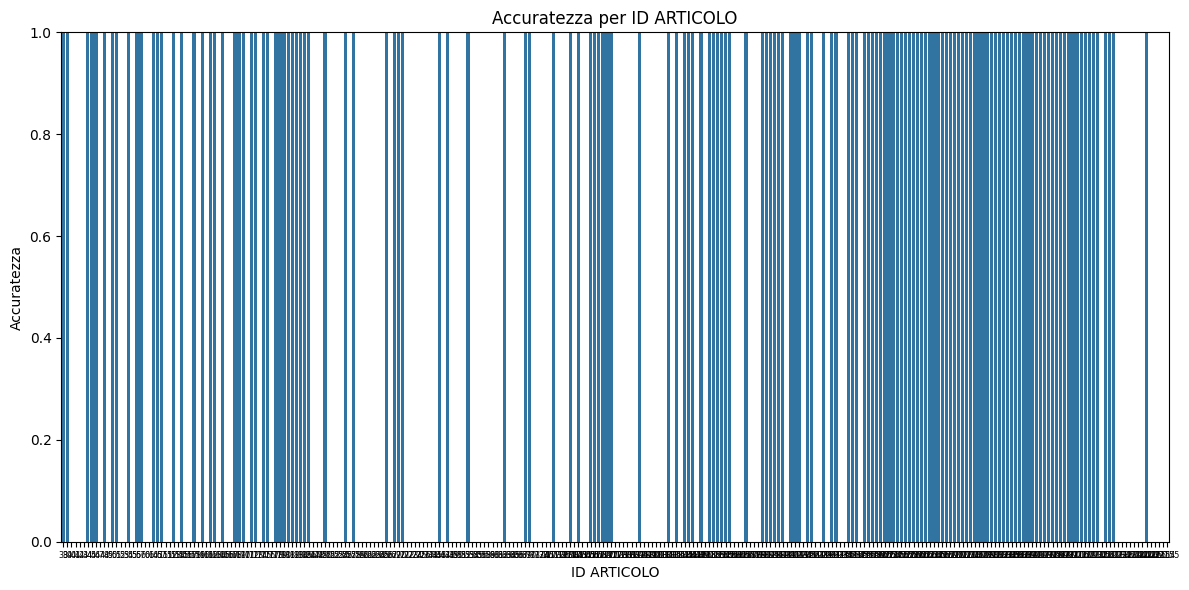

     ID ARTICOLO  Correctly_Labeled  Total_Tuples  Accuracy
0             38                 13            13       1.0
1             39                 12            12       1.0
2             40                  0            21       0.0
3             41                  0            13       0.0
4             42                  0            16       0.0
..           ...                ...           ...       ...
266        12149                  0            13       0.0
267        12150                  0            20       0.0
268        12151                  0            20       0.0
269        12154                  0            10       0.0
270        12155                  0            14       0.0

[271 rows x 4 columns]


In [ ]:
# Crea una nuova colonna per indicare se la tupla è stata etichettata correttamente
df['Correct_Label'] = df['CAMPAGNA'] == df['Campagna Assegnata']

# Raggruppa per ID ARTICOLO e calcola il numero di tuple totali e corrette
article_stats = df.groupby('ID ARTICOLO')['Correct_Label'].agg(['sum', 'count']).reset_index()
article_stats.columns = ['ID ARTICOLO', 'Correctly_Labeled', 'Total_Tuples']

# Calcola l'accuratezza per ogni articolo
article_stats['Accuracy'] = article_stats['Correctly_Labeled'] / article_stats['Total_Tuples']

# Crea un bar plot dell'accuratezza per articolo
plt.figure(figsize=(12, 6))
sns.barplot(x='ID ARTICOLO', y='Accuracy', data=article_stats)

# Aggiungi titoli e etichette
plt.title('Accuratezza per ID ARTICOLO')
plt.xlabel('ID ARTICOLO')
plt.ylabel('Accuratezza')
plt.xticks(rotation=0, fontsize='xx-small',linespacing=100000)  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

# Stampa le statistiche per controllo
print(article_stats)

### TF-IDF Thresholding

In [ ]:
import pandas as pd

# Carica il file Excel
df = pd.read_excel('/content/TF-IDF Thresholding Result (A).xlsx')

# Calcola l'Accuracy
accuracy = (df['CAMPAGNA'] == df['Campagna Assegnata']).mean()

# Calcola la campagna-specific accuracy
campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).mean())

# Calcola il Misclassification Rate
misclassification_rate = 1 - accuracy

# Calcola la Coverage
coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).sum() > 0)).mean()

# Calcola l'Accuracy specifica per numero di articoli
# Raggruppa per ID ARTICOLO e controlla se tutte le tuple per ogni articolo sono corrette
article_accuracy = df.groupby('ID ARTICOLO').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).all()).mean()

# Stampa i risultati
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
# print("\nCampagna-Specific Accuracy:")
#print(campagna_specific_accuracy)
print(f"\nCoverage: {coverage:.2f}")
print(f"Accuracy per Articolo: {article_accuracy:.2f}")

Accuracy: 0.13
Misclassification Rate: 0.87

Coverage: 0.39
Accuracy per Articolo: 0.08


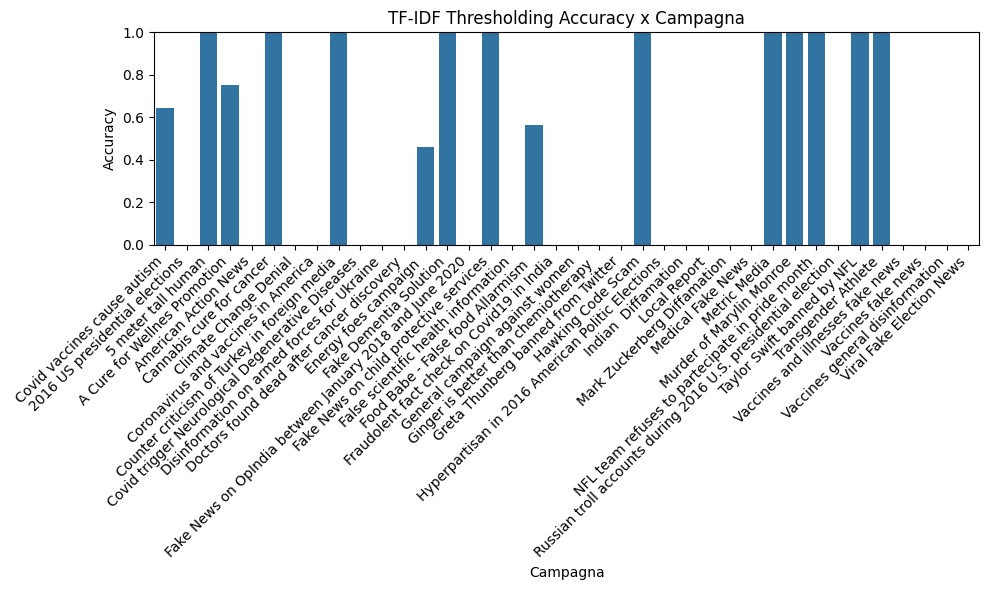

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Crea un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=campagna_specific_accuracy.index, y=campagna_specific_accuracy.values)

# Aggiungi titoli e etichette
plt.title('TF-IDF Thresholding Accuracy x Campagna')
plt.xlabel('Campagna')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

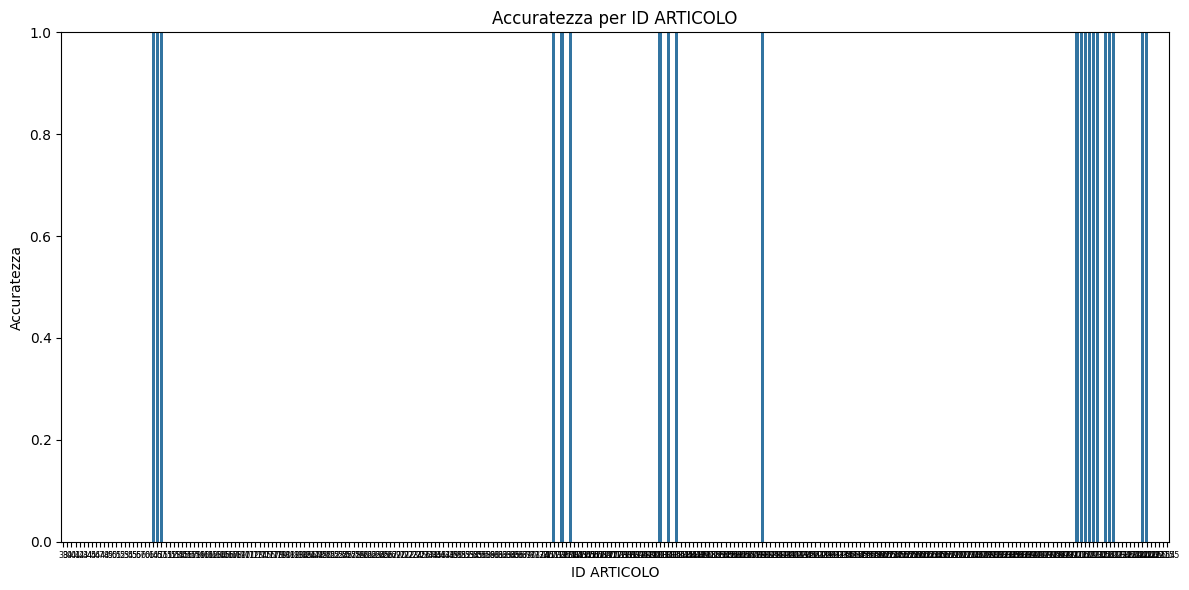

     ID ARTICOLO  Correctly_Labeled  Total_Tuples  Accuracy
0             38                  0            13       0.0
1             39                  0            12       0.0
2             40                  0            21       0.0
3             41                  0            13       0.0
4             42                  0            16       0.0
..           ...                ...           ...       ...
266        12149                  0            13       0.0
267        12150                  0            20       0.0
268        12151                  0            20       0.0
269        12154                  0            10       0.0
270        12155                  0            14       0.0

[271 rows x 4 columns]


In [ ]:
# Crea una nuova colonna per indicare se la tupla è stata etichettata correttamente
df['Correct_Label'] = df['CAMPAGNA'] == df['Campagna Assegnata']

# Raggruppa per ID ARTICOLO e calcola il numero di tuple totali e corrette
article_stats = df.groupby('ID ARTICOLO')['Correct_Label'].agg(['sum', 'count']).reset_index()
article_stats.columns = ['ID ARTICOLO', 'Correctly_Labeled', 'Total_Tuples']

# Calcola l'accuratezza per ogni articolo
article_stats['Accuracy'] = article_stats['Correctly_Labeled'] / article_stats['Total_Tuples']

# Crea un bar plot dell'accuratezza per articolo
plt.figure(figsize=(12, 6))
sns.barplot(x='ID ARTICOLO', y='Accuracy', data=article_stats)

# Aggiungi titoli e etichette
plt.title('Accuratezza per ID ARTICOLO')
plt.xlabel('ID ARTICOLO')
plt.ylabel('Accuratezza')
plt.xticks(rotation=0, fontsize='xx-small',linespacing=100000)  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

# Stampa le statistiche per controllo
print(article_stats)

### SBERT VOTING

In [ ]:
import pandas as pd

# Carica il file Excel
df = pd.read_excel('/content/SBERT Voting Result (A).xlsx')

# Calcola l'Accuracy
accuracy = (df['CAMPAGNA'] == df['Campagna Assegnata']).mean()

# Calcola la campagna-specific accuracy
campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).mean())

# Calcola il Misclassification Rate
misclassification_rate = 1 - accuracy

# Calcola la Coverage
coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).sum() > 0)).mean()

# Calcola l'Accuracy specifica per numero di articoli
# Raggruppa per ID ARTICOLO e controlla se tutte le tuple per ogni articolo sono corrette
article_accuracy = df.groupby('ID ARTICOLO').apply(lambda x: (x['CAMPAGNA'] == x['Campagna Assegnata']).all()).mean()

# Stampa i risultati
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
# print("\nCampagna-Specific Accuracy:")
#print(campagna_specific_accuracy)
print(f"\nCoverage: {coverage:.2f}")
print(f"Accuracy per Articolo: {article_accuracy:.2f}")

Accuracy: 0.73
Misclassification Rate: 0.27

Coverage: 0.61
Accuracy per Articolo: 0.68


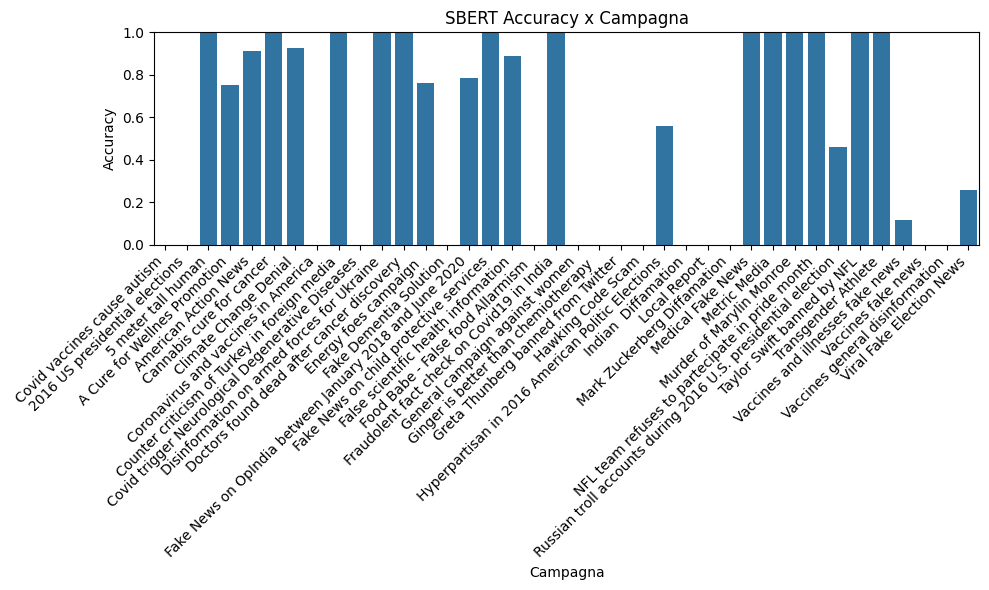

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Crea un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=campagna_specific_accuracy.index, y=campagna_specific_accuracy.values)

# Aggiungi titoli e etichette
plt.title('SBERT Accuracy x Campagna')
plt.xlabel('Campagna')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

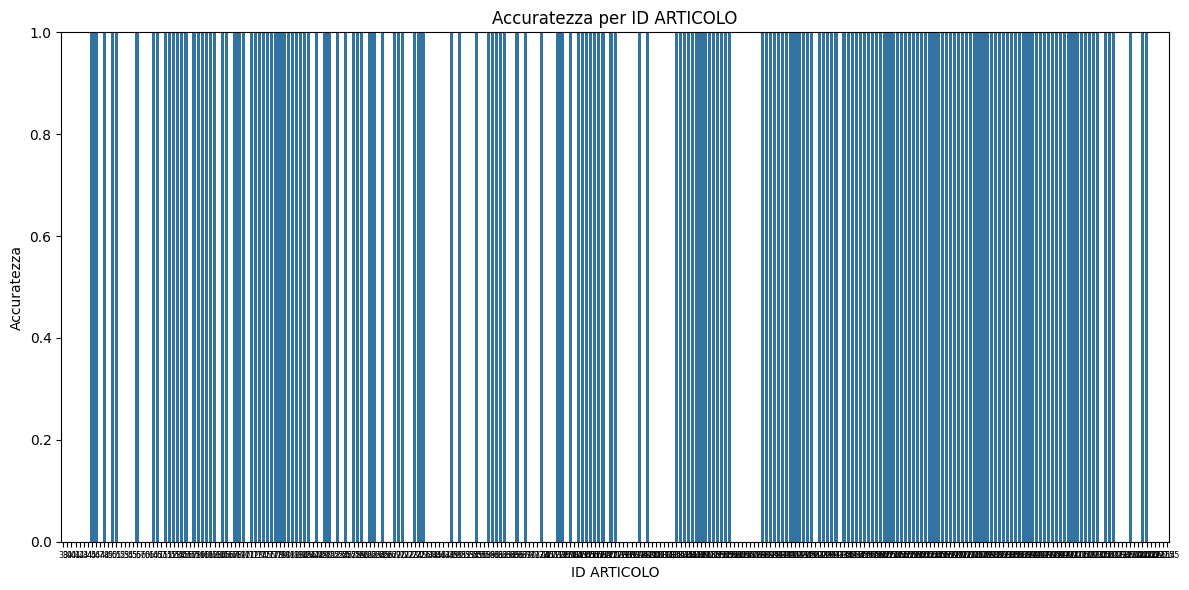

     ID ARTICOLO  Correctly_Labeled  Total_Tuples  Accuracy
0             38                  0            13       0.0
1             39                  0            12       0.0
2             40                  0            21       0.0
3             41                  0            13       0.0
4             42                  0            16       0.0
..           ...                ...           ...       ...
266        12149                  0            13       0.0
267        12150                  0            20       0.0
268        12151                  0            20       0.0
269        12154                  0            10       0.0
270        12155                  0            14       0.0

[271 rows x 4 columns]


In [ ]:
# Crea una nuova colonna per indicare se la tupla è stata etichettata correttamente
df['Correct_Label'] = df['CAMPAGNA'] == df['Campagna Assegnata']

# Raggruppa per ID ARTICOLO e calcola il numero di tuple totali e corrette
article_stats = df.groupby('ID ARTICOLO')['Correct_Label'].agg(['sum', 'count']).reset_index()
article_stats.columns = ['ID ARTICOLO', 'Correctly_Labeled', 'Total_Tuples']

# Calcola l'accuratezza per ogni articolo
article_stats['Accuracy'] = article_stats['Correctly_Labeled'] / article_stats['Total_Tuples']

# Crea un bar plot dell'accuratezza per articolo
plt.figure(figsize=(12, 6))
sns.barplot(x='ID ARTICOLO', y='Accuracy', data=article_stats)

# Aggiungi titoli e etichette
plt.title('Accuratezza per ID ARTICOLO')
plt.xlabel('ID ARTICOLO')
plt.ylabel('Accuratezza')
plt.xticks(rotation=0, fontsize='xx-small',linespacing=100000)  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

# Stampa le statistiche per controllo
print(article_stats)

##DNN Finetuning

In [ ]:
import pandas as pd

# Carica il file Excel
df = pd.read_excel('/content/DNN Finetuning Results.xlsx')

# Calcola l'Accuracy
accuracy = (df['CAMPAGNA'] == df['CAMPAGNA PREDETTA']).mean()

# Calcola la campagna-specific accuracy
campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['CAMPAGNA PREDETTA']).mean())

# Calcola il Misclassification Rate
misclassification_rate = 1 - accuracy

# Calcola la Coverage
coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['CAMPAGNA PREDETTA']).sum() > 0)).mean()

# Calcola l'Accuracy specifica per numero di articoli
# Raggruppa per ID ARTICOLO e controlla se tutte le tuple per ogni articolo sono corrette
article_accuracy = df.groupby('ID ARTICOLO').apply(lambda x: (x['CAMPAGNA'] == x['CAMPAGNA PREDETTA']).all()).mean()

# Stampa i risultati
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
# print("\nCampagna-Specific Accuracy:")
#print(campagna_specific_accuracy)
print(f"\nCoverage: {coverage:.2f}")
print(f"Accuracy per Articolo: {article_accuracy:.2f}")

Accuracy: 0.94
Misclassification Rate: 0.06

Coverage: 1.00
Accuracy per Articolo: 0.91


In [ ]:
df.head()

,TUPLA,CAMPAGNA,CAMPAGNA PREDETTA,ID ARTICOLO,Campagna VOTING
0,Ukrainian Armed Forces - used - civilian equip...,Disinformation on armed forces for Ukraine,Disinformation on armed forces for Ukraine,11958,Disinformation on armed forces for Ukraine
1,Half of all fluoroquinolones - have been remov...,Vaccines and illnesses fake news,Vaccines and illnesses fake news,12127,Vaccines and illnesses fake news
2,CLINTEL Group - will give - advice on climate ...,Climate Change Denial,Climate Change Denial,11768,Climate Change Denial
3,Memory loss - may - manifest,Medical Fake News,Medical Fake News,12022,Medical Fake News
4,Samantha Lee - argue - this isn't just about s...,Transgender Athlete,False scientific health information,12105,Transgender Athlete


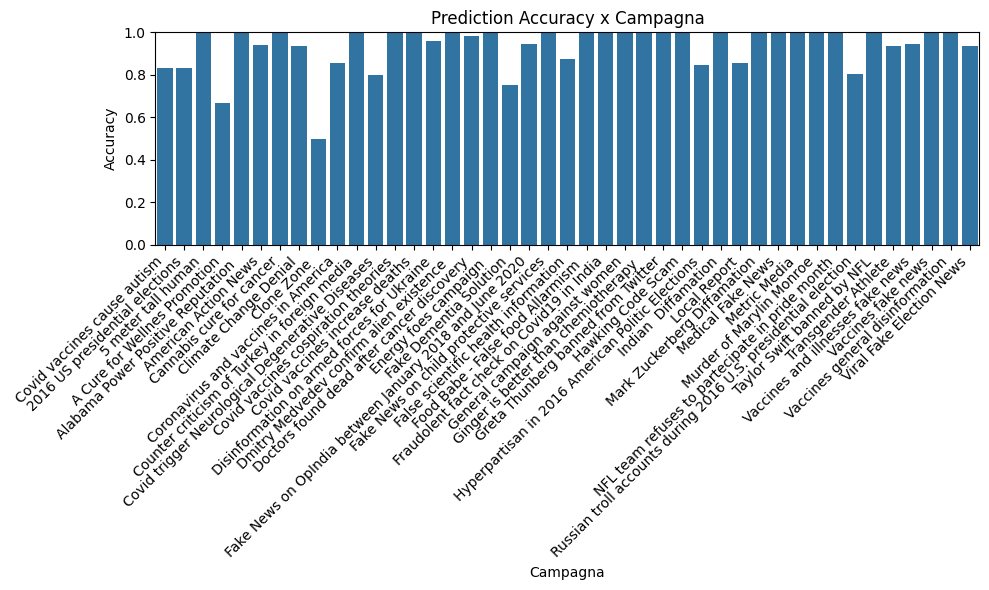

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Crea un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=campagna_specific_accuracy.index, y=campagna_specific_accuracy.values)

# Aggiungi titoli e etichette
plt.title('Prediction Accuracy x Campagna')
plt.xlabel('Campagna')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()

In [ ]:
# Calcola l'Accuracy
accuracy = (df['CAMPAGNA'] == df['Campagna VOTING']).mean()

# Calcola la campagna-specific accuracy
campagna_specific_accuracy = df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna VOTING']).mean())

# Calcola il Misclassification Rate
misclassification_rate = 1 - accuracy

# Calcola la Coverage
coverage = (df.groupby('CAMPAGNA').apply(lambda x: (x['CAMPAGNA'] == x['Campagna VOTING']).sum() > 0)).mean()

# Calcola l'Accuracy specifica per numero di articoli
# Raggruppa per ID ARTICOLO e controlla se tutte le tuple per ogni articolo sono corrette
article_accuracy = df.groupby('ID ARTICOLO').apply(lambda x: (x['CAMPAGNA'] == x['Campagna VOTING']).all()).mean()

# Stampa i risultati
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
# print("\nCampagna-Specific Accuracy:")
#print(campagna_specific_accuracy)
print(f"\nCoverage: {coverage:.2f}")
print(f"Accuracy per Articolo: {article_accuracy:.2f}")

Accuracy: 0.96
Misclassification Rate: 0.04

Coverage: 1.00
Accuracy per Articolo: 0.94


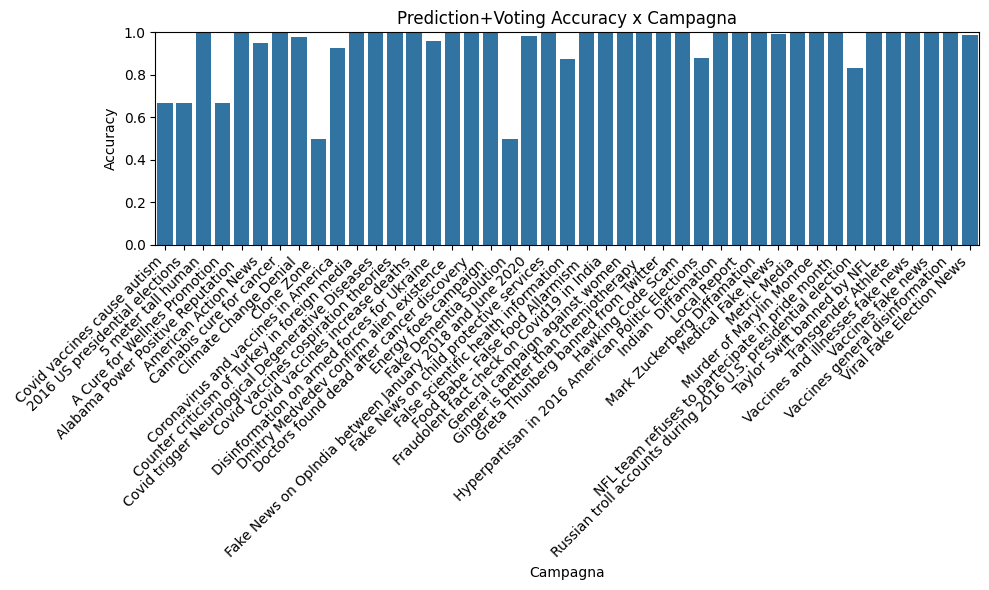

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Crea un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=campagna_specific_accuracy.index, y=campagna_specific_accuracy.values)

# Aggiungi titoli e etichette
plt.title('Prediction+Voting Accuracy x Campagna')
plt.xlabel('Campagna')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.ylim(0, 1)  # Imposta il limite dell'asse y da 0 a 1

# Mostra il grafico
plt.tight_layout()
plt.show()